In [1]:
import pandas as pd
from statistics import mean, stdev 

# Load and Prepare data

In [2]:
merchant_train = pd.read_csv('../data/curated/final_model/agg_fortnightly_mean_sd_marketcorr_train_NOFRAUD.csv')
merchant_validate = pd.read_csv('../data/curated/final_model/agg_fortnightly_mean_sd_marketcorr_validate_NOFRAUD.csv')
merchant_overall = pd.read_csv('../data/curated/final_model/agg_fortnightly_mean_sd_marketcorr_NOFRAUD.csv')

merchant_fortnight_train = pd.read_csv('../data/curated/final_model/fortnightly_agg_merchant_transactions_train_NOFRAUD.csv')
merchant_fortnight_validate = pd.read_csv('../data/curated/final_model/fortnightly_agg_merchant_transactions_validate_NOFRAUD.csv')
merchant_fortnight= pd.read_csv('../data/curated/final_model/fortnightly_agg_merchant_transactions_NOFRAUD.csv')

In [3]:
growth_train = pd.read_csv('../data/curated/final_model/E(r)_train.csv')

growth_overall = pd.read_csv('../data/curated/final_model/E(r)_final.csv')

In [4]:
# merge dataset with 4th variable
merchant_train = merchant_train.merge(growth_train, on='merchant_abn', how='inner')
merchant_train

# merge dataset with 4th variable
merchant_overall = merchant_overall.merge(growth_overall, on='merchant_abn', how='inner')
merchant_overall

,merchant_abn,mean,stdev,n_periods,corr,covar,beta,weighted E(r)
0,10023283211,70749.673866,18636.265281,23,0.924841,2.089959e+11,0.001421,-0.323900
1,10142254217,22397.234199,7661.654456,23,0.848513,7.883019e+10,0.000536,-0.380866
2,10187291046,6739.845784,3296.685077,23,0.356489,1.425068e+10,0.000097,-0.589436
3,10192359162,41976.201423,19772.703184,23,0.503911,1.208179e+11,0.000822,-0.551896
4,10206519221,90606.920640,25122.144347,23,0.945070,2.878939e+11,0.001958,-0.383000
...,...,...,...,...,...,...,...,...
4348,99938978285,106653.055688,25983.036269,23,0.978122,3.081731e+11,0.002096,-0.395115
4349,99974311662,6155.721098,3952.631998,23,0.301563,1.445361e+10,0.000098,-0.351165
4350,99976658299,877875.375777,223217.077839,23,0.983820,2.662900e+12,0.018111,-0.391975
4351,99987905597,13342.109019,7503.391891,23,0.349577,3.180625e+10,0.000216,-0.378324


# Define functions

First write function that gets scores of all stores

In [6]:
# sometimes std/covar has nan values, fill them with 0
merchant_overall = merchant_overall.fillna(0)
merchant_train = merchant_train.fillna(0)
merchant_validate = merchant_validate.fillna(0)

a_combo = [1, 1, 1, 1]

In [7]:
def get_hscore(merchant_train, a_combo, k):
    # helper function to get the score for a company using h value input
    VARNAME = ['mean', 'stdev', 'corr', 'weighted E(r)']

    merchant_train['score'] = a_combo[0] * merchant_train[VARNAME[0]]

    for i in range(1, k):
        merchant_train['score'] = merchant_train['score'] + a_combo[i] * merchant_train[VARNAME[i]]
    
    return merchant_train[['merchant_abn', 'score']]

In [8]:
# testrun of helper function
merchants_train_score = get_hscore(merchant_train, a_combo, 3)
merchants_train_score

,merchant_abn,score
0,10023283211,8.938686e+04
1,10142254217,3.005974e+04
2,10187291046,1.003689e+04
3,10192359162,6.174941e+04
4,10206519221,1.157300e+05
...,...,...
4348,99938978285,1.326371e+05
4349,99974311662,1.010865e+04
4350,99976658299,1.101093e+06
4351,99987905597,2.084585e+04


Get top 100 and make into portfolio (just a list)

In [9]:
def get_portfolio_abn(merchants_train_score):
    # get the top 100 merchant's abn
    
    sorted_merchants_train_score = merchants_train_score.sort_values(['score'], ascending=False)

    top_100_portfolio = sorted_merchants_train_score.head(100)

    top_portfolio_merchants = list(top_100_portfolio['merchant_abn'])

    return top_portfolio_merchants

In [10]:
# testrun the function
top_portfolio_merchants = get_portfolio_abn(merchants_train_score)
top_portfolio_merchants

[79827781481,
 38700038932,
 48534649627,
 32361057556,
 86578477987,
 96680767841,
 21439773999,
 63123845164,
 45629217853,
 64403598239,
 82368304209,
 89726005175,
 94493496784,
 35909341340,
 79417999332,
 76767266140,
 49322182190,
 90568944804,
 80551528183,
 43186523025,
 67978471888,
 40515428545,
 72472909171,
 75454398468,
 98166254020,
 45433476494,
 32709545238,
 34179569263,
 60956456424,
 49891706470,
 27093785141,
 80518954462,
 49212265466,
 34096466752,
 98973094975,
 49549583265,
 93558142492,
 58454491168,
 27326652377,
 38090089066,
 94690988633,
 31385641294,
 68559320474,
 49505931725,
 22033359776,
 90543168331,
 24852446429,
 57757792876,
 13514558491,
 35223308778,
 99291944648,
 18158387243,
 50315283629,
 93260930990,
 67400260923,
 77590625261,
 39649557865,
 42355028515,
 76819856970,
 21772962346,
 87084550311,
 28057731482,
 71759376949,
 64203420245,
 89022158521,
 21359184622,
 46804135891,
 68216911708,
 76314317957,
 70033549200,
 77338620996,
 11439

Get Portfolio Stats (load periodic data and add up)

- get portfolio fortnightly E[r] and sd(r) after summing up portfolio transactions for each fortnight and take mean(), std()
- calculate E(r) / sd(r)

In [11]:
def get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants):
    # calculate the sharpe ratio using the validate

    top_100_portfolio_fortnightly = pd.DataFrame()

    for abn in top_portfolio_merchants:
        tmp = merchant_fortnight_validate[merchant_fortnight_validate['merchant_abn'] == abn]
        top_100_portfolio_fortnightly = pd.concat([top_100_portfolio_fortnightly, tmp])

    top_100_portfolio_fortnightly_agg = top_100_portfolio_fortnightly.groupby(['Year', 'Fortnight']).agg({'sum_transactions': mean})

    top_100_portfolio_fortnightly_mean = mean(top_100_portfolio_fortnightly_agg['sum_transactions'])
    top_100_portfolio_fortnightly_sd = stdev(top_100_portfolio_fortnightly_agg['sum_transactions'])

    portfolio_sharpe_ratio = top_100_portfolio_fortnightly_mean/top_100_portfolio_fortnightly_sd
    
    return portfolio_sharpe_ratio

In [12]:
# testrun the function
portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants)
portfolio_sharpe_ratio

8.388794805205118

# Run Test

In [23]:
from YangZhou.GuidanceAlgorithm import *
from YangZhou.CruiseEngine import *
from YangZhou.CruiseAlgorithm import *

In [24]:
# Set values to try in each hyperparameter value

arguments = {
    "a1": {1: -10000, 2: -100, 3: -10, 4: -1, 5: -0.1, 6: -0.01, 7:-0.001, 8:0, 9:0.001, 10:0.01, 11:0.1, 12:1, 13:10, 14:100, 15:1000, 16:10000},
    "a2": {1: -10000, 2: -100, 3: -10, 4: -1, 5: -0.1, 6: -0.01, 7:-0.001, 8:0, 9:0.001, 10:0.01, 11:0.1, 12:1, 13:10, 14:100, 15:1000, 16:10000},
    "a3": {1: -10000, 2: -100, 3: -10, 4: -1, 5: -0.1, 6: -0.01, 7:-0.001, 8:0, 9:0.001, 10:0.01, 11:0.1, 12:1, 13:10, 14:100, 15:1000, 16:10000},
    "a4": {1: -10000, 2: -100, 3: -10, 4: -1, 5: -0.1, 6: -0.01, 7:-0.001, 8:0, 9:0.001, 10:0.01, 11:0.1, 12:1, 13:10, 14:100, 15:1000, 16:10000}
}
arguments

{'a1': {1: -10000,
  2: -100,
  3: -10,
  4: -1,
  5: -0.1,
  6: -0.01,
  7: -0.001,
  8: 0,
  9: 0.001,
  10: 0.01,
  11: 0.1,
  12: 1,
  13: 10,
  14: 100,
  15: 1000,
  16: 10000},
 'a2': {1: -10000,
  2: -100,
  3: -10,
  4: -1,
  5: -0.1,
  6: -0.01,
  7: -0.001,
  8: 0,
  9: 0.001,
  10: 0.01,
  11: 0.1,
  12: 1,
  13: 10,
  14: 100,
  15: 1000,
  16: 10000},
 'a3': {1: -10000,
  2: -100,
  3: -10,
  4: -1,
  5: -0.1,
  6: -0.01,
  7: -0.001,
  8: 0,
  9: 0.001,
  10: 0.01,
  11: 0.1,
  12: 1,
  13: 10,
  14: 100,
  15: 1000,
  16: 10000},
 'a4': {1: -10000,
  2: -100,
  3: -10,
  4: -1,
  5: -0.1,
  6: -0.01,
  7: -0.001,
  8: 0,
  9: 0.001,
  10: 0.01,
  11: 0.1,
  12: 1,
  13: 10,
  14: 100,
  15: 1000,
  16: 10000}}

In [25]:
num_arg_vals = [len(arguments[i]) for i in arguments]
num_arg_vals

[16, 16, 16, 16]

YangZhou Algorithm

In [26]:
def get_new_cores(core, num_arg_val, surrounding_vectors, found, checked_boxes,
                  checked_core, merchant_train, merchant_fortnight_validate, arguments, tuning_results):

    # if (should be rare) case where core has been a core before, then skip. For prevention of infinite loops
    if checked_core[flatten_coordinates_h(core, num_arg_val)] == 2:
        prev_checked = 1
    else:
        checked_core[flatten_coordinates_h(core, num_arg_val)] = 2
        prev_checked = 0

    if prev_checked:
        print('Prev checked:', core, '!\n')
        return [], found, checked_boxes, checked_core, tuning_results

    # prepare data for welch test
    surrounding_coordinates = get_surrounding_coordinates(core,
                                            surrounding_vectors, num_arg_val)

    indices = get_indices(core)

    # put coordinates into treatments and nulls
    treatment, null, direction = get_blocks(core, surrounding_coordinates,
                                            surrounding_vectors, indices, num_arg_val)

    # actually tune the surrounding coordinates
    for coord in surrounding_coordinates:
        #TODO: TRAIN AND TEST
        index = flatten_coordinates_h(coord, num_arg_val)
        if checked_boxes[index] == 0:
            val_accu, tuning_results = train_and_get_accuracies(arguments,
                                            coord, merchant_train, merchant_fortnight_validate, tuning_results)

            found[index] = val_accu
            checked_boxes[index] = 1

    # perform welch test and return surrounding coordinates that should be used as new core
    new_cores = find_new_core1(treatment, null, direction, num_arg_val, found)

    return new_cores, found, checked_boxes, checked_core, tuning_results

In [27]:
def YangZhou_GuidanceSystem(core, num_arg_val, surrounding_vectors, found,
                            checked_boxes, restarts, checked_core, been_best,
                            merchant_train, merchant_fortnight_validate, arguments, tuning_results):

    if restarts == 0:
        print("BEGIN INITIAL GUIDANCE\n")
    else:
        print("RESTART GUIDANCE: ROUND", restarts, '\n')

    print('ROUND', restarts, 'ITERATION: ', 0, '\n')

    # first get a surrounding 3^d tuned
    new_cores, found, checked_boxes, checked_core, tuning_results = get_new_cores(core,
                                                num_arg_val, surrounding_vectors, found,
                                                checked_boxes, checked_core, merchant_train, merchant_fortnight_validate,
                                                arguments, tuning_results)
    for new_core in new_cores: # only add if not checked before
        if checked_core[flatten_coordinates_h(new_core, num_arg_val)] == 0:
            checked_core[flatten_coordinates_h(new_core, num_arg_val)] = 1

    round = 1
    while new_cores: # while new cores are being added
        print('ROUND', restarts, "ITERATION: ", round, "\n")
        round += 1

        print('New cores:', new_cores, '\n')
        old_new_cores = deepcopy(new_cores)
        new_cores = list()

        # for each of the new cores, 'recursively' tune and grab new cores;
        # but each Iteration doesn't end until all cores of current round has been checked
        for new_core in old_new_cores:

            new_new_cores, found, checked_boxes, checked_core, tuning_results = get_new_cores(new_core,
                                                    num_arg_val, surrounding_vectors, found, checked_boxes,
                                                    checked_core, merchant_train, merchant_fortnight_validate, 
                                                    arguments, tuning_results)

            for new_new_core in new_new_cores:
                if checked_core[flatten_coordinates_h(new_new_core, num_arg_val)] == 0:
                    new_cores.append(new_new_core)
                    checked_core[flatten_coordinates_h(new_new_core, num_arg_val)] = 1

    # for current max, get 3^d block. if new max happens to be found, continue to do 3^d block until no new max is found
    # just a cheap way to flesh out the max (the goal of YangZhou)
    max_combo = recreate_coordinates_h(np.argmax(found), num_arg_val)

    while been_best[flatten_coordinates_h((max_combo), num_arg_val)] == 0:

        been_best[flatten_coordinates_h((max_combo), num_arg_val)] = 1
        #add surrounding find!! ##functionalise
        surrounding_coordinates = get_surrounding_coordinates(max_combo, surrounding_vectors, num_arg_val)
        for coord in surrounding_coordinates:
            #TODO: TRAIN AND TEST
            index = flatten_coordinates_h(coord, num_arg_val)
            if checked_boxes[index] == 0:

                val_accu, tuning_results = train_and_get_accuracies(arguments, coord, 
                                merchant_train, merchant_fortnight_validate, tuning_results)

                found[index] = val_accu
                checked_boxes[index] = 1

        max_combo = recreate_coordinates_h(np.argmax(found),num_arg_val)

    max_accuracy = max(found)

    # print information of this round
    if restarts == 0:
        print(f"\nYANGZHOU INITIAL GUIDE STAGE ENDED\n")
    else:
        print(f"\nYANGZHOU GUIDE STAGE {restarts} ENDED\n")


    if len(arguments) == 2:
        print('Found: \n', np.array(found).reshape(num_arg_val).round(4), '\n')
        print('Checked Boxes: \n', np.array(checked_boxes).reshape(num_arg_val).round(4), '\n')

    print('Max Accuracy From This Guidance Round: \n', max(found))
    print('Max Combo From This Guidance Round: \n', max_combo)

    print('% Combos Checked Thus Far:', int(sum(checked_boxes)), 'out of', cond_prod(num_arg_val),
          'which is', f'{np.mean(checked_boxes).round(8)*100}%')


    return max_combo, max_accuracy, found, checked_boxes, checked_core, been_best, tuning_results

In [28]:
def YangZhou_CruiseSystem(arguments, num_arg, num_arg_val, surrounding_vectors, max_combo,
                          max_accuracy, found, checked_boxes, restarts, checked_core, merchant_train, merchant_fortnight_validate,
                          tuning_results):

    print(f"BEGIN CRUISING: ROUND {restarts}\n")

    # get cruise coordinates in sorted order (furthest away from current max)
    sorted_cruise_coordinates = get_sorted_cruise_coordinates(arguments, num_arg, max_combo)

    # calculate warning threshold
    max_surrounding_mean, max_surrounding_sd = get_max_surrounding_mean_sd(max_combo,
                                                max_accuracy, surrounding_vectors, num_arg_val, found)

    #TODO: add parameter to specify which warning_threshold

    # warning_threshold = cruise_warning_threshold1(max_accuracy, max_surrounding_sd, len(surrounding_vectors)-1)
    warning_threshold = cruise_warning_threshold2(max_accuracy, max_surrounding_sd, len(surrounding_vectors)-1)
    # warning_threshold = cruise_warning_threshold3(max_surrounding_mean, max_surrounding_sd, len(surrounding_vectors)-1)
    # warning_threshold = cruise_warning_threshold4(max_surrounding_mean, max_surrounding_sd, len(surrounding_vectors)-1)

    # check each cruise coordinate
    for cruise_coord in sorted_cruise_coordinates:
        index = flatten_coordinates_h(cruise_coord, num_arg_val)

        # only search if it hasn't been checked before (if has then is not an artifect of significance)
        if not checked_boxes[index]:
            val_accu, tuning_results = train_and_get_accuracies(arguments, cruise_coord,
                                                    merchant_train, merchant_fortnight_validate, tuning_results)

            found[index] = val_accu
            checked_boxes[index] = 1

            # if above warning threshold, then stop cruise and restart guide
            if found[index] >= warning_threshold:
                if len(arguments) == 2:
                    print('Found: \n', np.array(found).reshape(num_arg_val).round(4), '\n')
                    print('Checked Boxes: \n', np.array(checked_boxes).reshape(num_arg_val).round(4), '\n')

                print('Max Accuracy From This Guidance Round: \n', max(found))
                print('Max Combo From This Guidance Round: \n', max_combo)

                print('% Combos Checked Thus Far:', int(sum(checked_boxes)), 'out of',
                      cond_prod(num_arg_val), 'which is', f'{np.mean(checked_boxes).round(8)*100}%')

                print(f"YANGZHOU CRUISE STAGE {restarts} ENDED, RESTARTING GUIDANCE\n")
                return 1, cruise_coord, found, checked_boxes, checked_core, tuning_results

    # if reach here then all cruise indicies checked. can safely say end cruise
    print(f"YANGZHOU CRUISE STAGE {restarts} ENDED\n")
    print(f"YANGZHOU CRUISE SYSTEM SHUTDOWN\n\n")

    return 0, [], found, checked_boxes, checked_core, tuning_results

In [29]:
def YangZhou_CruiseSystem(arguments, num_arg, num_arg_val, surrounding_vectors, max_combo,
                          max_accuracy, found, checked_boxes, restarts, checked_core, merchant_train, merchant_fortnight_validate,
                           tuning_results):

    print(f"BEGIN CRUISING: ROUND {restarts}\n")

    # get cruise coordinates in sorted order (furthest away from current max)
    sorted_cruise_coordinates = get_sorted_cruise_coordinates(arguments, num_arg, max_combo)

    # calculate warning threshold
    max_surrounding_mean, max_surrounding_sd = get_max_surrounding_mean_sd(max_combo,
                                                max_accuracy, surrounding_vectors, num_arg_val, found)

    #TODO: add parameter to specify which warning_threshold

    # warning_threshold = cruise_warning_threshold1(max_accuracy, max_surrounding_sd, len(surrounding_vectors)-1)
    warning_threshold = cruise_warning_threshold2(max_accuracy, max_surrounding_sd, len(surrounding_vectors)-1)
    # warning_threshold = cruise_warning_threshold3(max_surrounding_mean, max_surrounding_sd, len(surrounding_vectors)-1)
    # warning_threshold = cruise_warning_threshold4(max_surrounding_mean, max_surrounding_sd, len(surrounding_vectors)-1)

    # check each cruise coordinate
    for cruise_coord in sorted_cruise_coordinates:
        index = flatten_coordinates_h(cruise_coord, num_arg_val)

        # only search if it hasn't been checked before (if has then is not an artifect of significance)
        if not checked_boxes[index]:
            val_accu, tuning_results = train_and_get_accuracies(arguments, cruise_coord,
                                                    merchant_train, merchant_fortnight_validate, tuning_results)

            found[index] = val_accu
            checked_boxes[index] = 1

            # if above warning threshold, then stop cruise and restart guide
            if found[index] >= warning_threshold:
                if len(arguments) == 2:
                    print('Found: \n', np.array(found).reshape(num_arg_val).round(4), '\n')
                    print('Checked Boxes: \n', np.array(checked_boxes).reshape(num_arg_val).round(4), '\n')

                print('Max Accuracy From This Guidance Round: \n', max(found))
                print('Max Combo From This Guidance Round: \n', max_combo)

                print('% Combos Checked Thus Far:', int(sum(checked_boxes)), 'out of',
                      cond_prod(num_arg_val), 'which is', f'{np.mean(checked_boxes).round(8)*100}%')

                print(f"YANGZHOU CRUISE STAGE {restarts} ENDED, RESTARTING GUIDANCE\n")
                return 1, cruise_coord, found, checked_boxes, checked_core, tuning_results

    # if reach here then all cruise indicies checked. can safely say end cruise
    print(f"YANGZHOU CRUISE STAGE {restarts} ENDED\n")
    print(f"YANGZHOU CRUISE SYSTEM SHUTDOWN\n\n")

    return 0, [], found, checked_boxes, checked_core, tuning_results

In [32]:
def train_and_get_accuracies(arguments, coord, merchant_train, merchant_fortnight_validate, tuning_results):

    merchants_train_score = get_hscore(merchant_train, [arguments[f'a{i+1}'][coord[i]] for i in range(4)], 4)
    top_portfolio_merchants = get_portfolio_abn(merchants_train_score)
    portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants)

    one_result = pd.DataFrame({'a1': [arguments['a1'][coord[0]]],
                               'a2': [arguments['a2'][coord[1]]],
                               'a3': [arguments['a3'][coord[2]]],
                               'a4': [arguments['a4'][coord[3]]],
                               'portfolio_sharpe_ratio': [portfolio_sharpe_ratio]})

    tuning_results = tuning_results.append(one_result)
    tuning_results.to_csv('../data/tuning/final_model.csv')


    return portfolio_sharpe_ratio, tuning_results

In [33]:
print("YANGZHOU SYSTEM ACTIVATED\n\n")

# Process inputs and initiate arguments
num_arg = {arg:len(arguments[arg]) for arg in arguments}
num_arg_val = list(num_arg.values())

arg_median_values = {arg:(num_arg[arg]//2)+1 for arg in arguments}
core = [arg_median_values[arg] for arg in num_arg]
print('Initial core:', core, '\n')
surrounding_vectors = get_surrounding_vectors(core)

found = np.zeros(np.prod(num_arg_val))
checked_boxes = np.zeros(np.prod(num_arg_val))
checked_core = np.zeros(np.prod(num_arg_val))
been_best = np.zeros(np.prod(num_arg_val))

tuning_results = pd.DataFrame()

print("YANGZHOU GUIDE SYSTEM ACTIVATED\n")

# Initial Round of Guidance
checked_core[flatten_coordinates_h(core, num_arg_val)] = 1
max_combo, max_accuracy, found, checked_boxes, checked_core, been_best, tuning_results = YangZhou_GuidanceSystem(core,
                                                                                num_arg_val, surrounding_vectors, found,
                                                                                checked_boxes, 0, checked_core, been_best,
                                                                                merchant_train, merchant_fortnight_validate, arguments,
                                                                                tuning_results)

# Recursively Cruise and restart Guide if find a combo that is within halfwidth of max
print("YANGZHOU CRUISE SYSTEM ACTIVATED\n")
cruising = 1
restarts = 1
while cruising:
    cruising, restart_core, found, checked_boxes, checked_core, tuning_results = YangZhou_CruiseSystem(arguments,
                                                                                    num_arg, num_arg_val, surrounding_vectors,
                                                                                    max_combo, max_accuracy, found, checked_boxes,
                                                                                    restarts, checked_core, merchant_train, merchant_fortnight_validate, tuning_results)

    if cruising:
        max_combo, max_accuracy, found, checked_boxes, checked_core, been_best, tuning_results = YangZhou_GuidanceSystem(restart_core,
                                                                                    num_arg_val, surrounding_vectors, found, checked_boxes,
                                                                                    restarts, checked_core, been_best, merchant_train, merchant_fortnight_validate, 
                                                                                    arguments, tuning_results)
        restarts += 1

# Final extensive search around maxes.
print("YANGZHOU FINAL GUIDANCE ACTIVATED\n")
old_max_accuracy = deepcopy(max_accuracy)
max_combo, max_accuracy, found, checked_boxes, checked_core, been_best, tuning_results = YangZhou_GuidanceSystem(max_combo,
                                                                                num_arg_val, surrounding_vectors, found,
                                                                                checked_boxes, 'FINAL', checked_core, been_best,
                                                                                merchant_train, merchant_fortnight_validate, arguments, tuning_results)
while(max_accuracy-old_max_accuracy > 0):
    old_max_accuracy = deepcopy(max_accuracy)
    max_combo, max_accuracy, found, checked_boxes, checked_core, tuning_results = YangZhou_GuidanceSystem(max_combo,
                                                                                num_arg_val, surrounding_vectors, found, checked_boxes,
                                                                                'FINAL', checked_core, been_best, merchant_train, merchant_fortnight_validate,
                                                                                 arguments, tuning_results)


# Display final information
print("YANGZHOU FINAL GUIDANCE STAGE ENDED")
print("YANGZHOU MISSION ACCOMPLISHED\n")

if len(arguments) == 2:
    print('Final Found: \n', np.array(found).reshape(num_arg_val).round(4), '\n')
    print('Final Checked Boxes: \n', np.array(checked_boxes).reshape(num_arg_val).round(4), '\n')
    print('Final Checked Cores: \n', np.array(checked_core).reshape(num_arg_val).round(4), '\n')

print('Max Accuracy: \n', max(found))
print('Max Combo: \n', max_combo)

print('% Combos Checked:', int(sum(checked_boxes)), 'out of', cond_prod(num_arg_val),
      'which is', f'{np.mean(checked_boxes).round(8)*100}%')

YANGZHOU SYSTEM ACTIVATED


Initial core: [9, 9, 9, 9] 

YANGZHOU GUIDE SYSTEM ACTIVATED

BEGIN INITIAL GUIDANCE

ROUND 0 ITERATION:  0 

ROUND 0 ITERATION:  1 

New cores: [[8, 8, 10, 9], [10, 10, 8, 8]] 

ROUND 0 ITERATION:  2 

New cores: [[11, 11, 7, 7], [9, 9, 7, 7]] 

ROUND 0 ITERATION:  3 

New cores: [[12, 12, 6, 6], [10, 10, 6, 6]] 

ROUND 0 ITERATION:  4 

New cores: [[13, 13, 5, 5], [11, 11, 5, 5], [9, 9, 5, 5]] 

ROUND 0 ITERATION:  5 

New cores: [[14, 14, 4, 4], [12, 12, 4, 4], [10, 10, 4, 4]] 

ROUND 0 ITERATION:  6 

New cores: [[15, 15, 3, 3], [13, 13, 3, 3], [11, 11, 3, 3], [9, 9, 3, 3]] 

ROUND 0 ITERATION:  7 

New cores: [[16, 16, 2, 2], [14, 14, 2, 2], [12, 12, 2, 2], [10, 10, 2, 2]] 

ROUND 0 ITERATION:  8 

New cores: [[15, 15, 1, 1], [13, 13, 1, 1], [11, 11, 1, 1], [9, 11, 1, 2]] 

ROUND 0 ITERATION:  9 

New cores: [[8, 10, 2, 1]] 

ROUND 0 ITERATION:  10 

New cores: [[7, 11, 1, 2], [7, 10, 2, 1], [9, 9, 3, 1], [8, 10, 3, 1]] 


YANGZHOU INITIAL GUIDE STAGE E

ValueError: not enough values to unpack (expected 5, got 4)

In [13]:
a_combos = []

a_values = [-10000, -100, -10, -1, -0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for a1 in a_values:
    # a_combos.append([a1])
    for a2 in a_values:
        # a_combos.append([a1, a2])
        for a3 in a_values:
            # a_combos.append([a1, a2, a3])
            for a4 in a_values:
                a_combos.append([a1, a2, a3, a4])

In [16]:
all_sharpe_ratios = list()

for a_combo in a_combos:
    merchants_train_score = get_hscore(merchant_train, a_combo, 4)

    top_portfolio_merchants = get_portfolio_abn(merchants_train_score)

    portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_fortnight_validate, top_portfolio_merchants)

    all_sharpe_ratios.append(portfolio_sharpe_ratio)

[5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,
 5.000364000412758,


In [18]:
results = pd.DataFrame({'all_combos': a_combos, 'sharpe_ratio': all_sharpe_ratios}).sort_values(['sharpe_ratio'], ascending = False)

# Analyse Results

In [19]:
results.head(60)

,all_combos,sharpe_ratio
30644,"[0, 0, 1, -0.1]",12.437161
30629,"[0, 0, 0.1, -0.01]",12.437161
30614,"[0, 0, 0.01, -0.001]",12.437161
30674,"[0, 0, 100, -10]",12.437161
30659,"[0, 0, 10, -1]",12.437161
30689,"[0, 0, 1000, -100]",12.437161
30649,"[0, 0, 1, 0.01]",12.400848
30666,"[0, 0, 10, 0.1]",12.400848
30700,"[0, 0, 1000, 10]",12.400848
30632,"[0, 0, 0.1, 0.001]",12.400848


In [20]:
results.describe()

,sharpe_ratio
count,65536.000000
mean,7.305726
std,2.172205
min,1.443304
25%,7.484926
50%,8.362399
75%,8.377182
max,12.437161


array([[<AxesSubplot:title={'center':'sharpe_ratio'}>]], dtype=object)

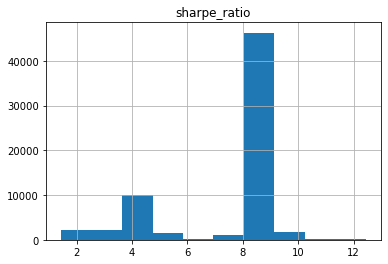

In [21]:
results.hist()

In [22]:
# results.to_csv('../data/curated/final_model/4.1_vars.csv', index=False)

# Get best combination

In [ ]:
final_a_combo = []

In [ ]:
merchants_overall_score = get_hscore(merchant_overall, final_a_combo, 4)

final_top_portfolio_merchants = get_portfolio_abn(merchants_overall_score)

By cluster

In [ ]:
portfolio_sharpe_ratio = get_sharpe_ratio_of_portfolio(merchant_overall, final_top_portfolio_merchants)

# By cluster

In [17]:
clusters = pd.read_csv('../data/curated/clusters/merchant_clusters.csv')

In [ ]:
clusters